# Lists

 * Mutable
 * Sequential
 * No syntax for multidimensional arrays (one dimensional)

## Why we need lists?

Imagine, you've programmed a bot that goes online shopping for you:

In [43]:
item_1 = 'Milk'
item_2 = 'Bread'
item_3 = 'Eggs'

# call the bot
# shopping_bot(item_1, item_2, item_3)

What if the next day you want it to buy one item more? You'll have to modify your bot to be aware about this extra item.

Well, we can create a list and put every item into it and make our bot accept that list.

In [44]:
shopping_list = ['Milk', 'Soda', 'Meat', 'Cat food']

# pretend we're calling our bot here
# shopping_bot(shopping_list)

Lists are much like strings (share some syntax) but while string is a collection of characters, list can hold any object (even other lists).

In [45]:
x = [10, True, 'Foo', ['Meow?'], None]
x

[10, True, 'Foo', ['Meow?'], None]

In [46]:
len(x)

5

Type (class) for lists is called:

In [47]:
type([1, 2, 3])

list

Lists can be created in many ways...

In [48]:
['x', 'o'] * 5

['x', 'o', 'x', 'o', 'x', 'o', 'x', 'o', 'x', 'o']

To create a copy of list

In [49]:
x[:]

[10, True, 'Foo', ['Meow?'], None]

## Truth about variables and assignments

Just like in any other dynamically typed programming languages, variables (and collection elements) contain references to (addresses of) values in memory. But assignment works differently: **it copies the reference not the value itself**.


### id()

Everything in Python is an object and you can get it's reference using function `id()`

In [50]:
id(True)

4472781408

In [51]:
id(0)

140194439265472

In [52]:
x = []
id(x)

4734473784

Proof that `list[:]` syntax clones the list.

In [53]:
id(x[:])

4734096592

**Be careful:** nested objects are not cloned this way, use `copy.deepcopy()` instead:

```
import copy
?copy.deepcopy
```

### is

`is` compares two references.

In [54]:
x = [1, 2, 3]
y = x
x is y

True

In [55]:
x is x[:]

False

### Circular references

Because lists can contain references to other lists, it is possible to store the reference to the list itself.

In [56]:
x = [1, 2, 3, 4, None]
x[4] = x

We've just created a recursive structure (you probably don't want it).

In [57]:
print len(x)
print len(x[4])
print len(x[4][4])
print len(x[4][4][4])

print x[4][4][4]

5
5
5
5
[1, 2, 3, 4, [...]]


## Creating lists

List can be created from any sequence. Example of coercing string to list:

In [58]:
list('String')

['S', 't', 'r', 'i', 'n', 'g']

In [59]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [60]:
[0] * 5

[0, 0, 0, 0, 0]

### List of lists

Sometimes you want to define a matrix. There's no special syntax for creating N-dimensional arrays in Python, but you can create a list of lists instead.

**Incorrect way:**

In [61]:
xx = [[0] * 3] * 3
xx

[[0, 0, 0], [0, 0, 0], [0, 0, 0]]

Why it's incorrect? Because of the side effect of references:

In [62]:
xx[0][0] = 'Oops'
xx

[['Oops', 0, 0], ['Oops', 0, 0], ['Oops', 0, 0]]

**Correct way of matrix definition:**

In [63]:
xx = [[0] * 3 for i in range(3)]
xx

[[0, 0, 0], [0, 0, 0], [0, 0, 0]]

In [64]:
xx[0][0] = 'Oops'
xx

[['Oops', 0, 0], [0, 0, 0], [0, 0, 0]]

### Operations on list

Slicing, just like for strings:

In [65]:
x = [10, True, 'Foo', ['Meow?'], None]
x[::2]

[10, 'Foo', None]

Remember that strings are immutable, there's no update syntax for them.

Lists **are mutable** and you can update an element like so:

In [66]:
x = [0] * 10

x[3] = 'Mooooooooo!'
x

[0, 0, 0, 'Mooooooooo!', 0, 0, 0, 0, 0, 0]

Nested lists can be accessed as well:

In [67]:
x = [0, 0, 0, ['Meow?'], 0]

x[3][0] = 'Mooooooooo!'
x

[0, 0, 0, ['Mooooooooo!'], 0]

Slicing can be used to replace multiple elements at once.

In [68]:
x = [0] * 5
x[0:3] = [False, False, False, False, False]
x

[False, False, False, False, False, 0, 0]

Concatenation of lists:

In [69]:
[1, 2] + [3, 4, 5]

[1, 2, 3, 4, 5]

Shorthand syntax using `+=` assignment.

In [70]:
x = [0] * 5
x += [3, 4, 5]
x

[0, 0, 0, 0, 0, 3, 4, 5]

To add a string to the list:

In [71]:
[1, 2] + ['Wow']

[1, 2, 'Wow']

Little bit confusing... Even because strings are sequential, list and string concatenation produces "TypeError: can only concatenate list (not "str") to list"

In [72]:
y = [1, 2, 3]
y = y + 'Oops'

TypeError: can only concatenate list (not "str") to list

However this line works

In [73]:
y = [1, 2, 3]
y += 'Ooops'
y

[1, 2, 3, 'O', 'o', 'o', 'p', 's']

In [74]:
y = [1, 2, 3]
y += ['Ooops']
y

[1, 2, 3, 'Ooops']

Lists can be compared

In [75]:
[1, 2] == [1, 2]

True

But still, `is` compares references!

In [76]:
[1, 2] is [1, 2]

False

In [77]:
[1, 2, 3] > [1, 2]

True

In [78]:
['a', 'b', 'd'] > ['a', 'b', 'c'] 

True

"in" works just like for strings

In [79]:
7 in range(10)

True

In [80]:
'vici' in ['veni', 'vidi', 'vici']

True

## Iterating the list

The ugly way:

In [81]:
my_list = ['veni', 'vidi', 'vici']
for i in range(len(my_list)):
    print my_list[i]

veni
vidi
vici


Pythonic way:

In [82]:
my_list = ['veni', 'vidi', 'vici']
for element in my_list:
    print element

veni
vidi
vici


## Popular methods of class list

Alternative to `x = x + [element]` or `x += [element]`:

In [83]:
x = ['Item', 'Item', 'Item']
x.append('Last')
x

['Item', 'Item', 'Item', 'Last']

Insert at position:

In [84]:
x.insert(0, 'First')
x

['First', 'Item', 'Item', 'Item', 'Last']

Destroy element given index: 

In [85]:
del x[1]
x

['First', 'Item', 'Item', 'Last']

Slicing also works

In [86]:
x = [1, 2, 3, 4, 5, 6, 7]
del x[::2]
x

[2, 4, 6]

**Be careful**, some list methods are "in-place", eg. change the object

In [87]:
x = ['First', 'Second', 'Third']
x.reverse()
x

['Third', 'Second', 'First']

Alternative function `reversed()` creates a new list (doesn't modify the original):

In [88]:
list(reversed(['First', 'Second', 'Third']))

['Third', 'Second', 'First']

in-place sorting

In [89]:
x = ['b', 'c', 'a']
x.sort()
x

['a', 'b', 'c']

"safe" version

In [90]:
sorted(['b', 'c', 'a'])

['a', 'b', 'c']

## List comprehensions

__\[__ `expression` __for__ `item` __in__ `list` __if__ `conditional` __\]__

The way you can create a list from an iterable (a sequence):

In [91]:
y = [i ** 2 for i in range(10)]
y

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

equivalent of:

In [92]:
y = []

for i in range(10):
    y += [i ** 2]
    
y

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [93]:
y = [i ** 2 for i in range(10) if i % 2]
y

[1, 9, 25, 49, 81]

equivalent of:

In [94]:
y = []

for i in range(10):
    if i % 2:
        y += [i ** 2]
    
y

[1, 9, 25, 49, 81]

More complex example. List comprehensions are concise but everything comes with a cost.

__\[__ `expression` __for__ `item1` __in__ `list1` __for__ `item2` __in__ `list2` __if__ `conditional` __\]__

The code below is not so readable:

In [95]:
str(['{} * {} = {}'.format(x, y, x * y) for x in range(1, 10) for y in range(1, 10)])

"['1 * 1 = 1', '1 * 2 = 2', '1 * 3 = 3', '1 * 4 = 4', '1 * 5 = 5', '1 * 6 = 6', '1 * 7 = 7', '1 * 8 = 8', '1 * 9 = 9', '2 * 1 = 2', '2 * 2 = 4', '2 * 3 = 6', '2 * 4 = 8', '2 * 5 = 10', '2 * 6 = 12', '2 * 7 = 14', '2 * 8 = 16', '2 * 9 = 18', '3 * 1 = 3', '3 * 2 = 6', '3 * 3 = 9', '3 * 4 = 12', '3 * 5 = 15', '3 * 6 = 18', '3 * 7 = 21', '3 * 8 = 24', '3 * 9 = 27', '4 * 1 = 4', '4 * 2 = 8', '4 * 3 = 12', '4 * 4 = 16', '4 * 5 = 20', '4 * 6 = 24', '4 * 7 = 28', '4 * 8 = 32', '4 * 9 = 36', '5 * 1 = 5', '5 * 2 = 10', '5 * 3 = 15', '5 * 4 = 20', '5 * 5 = 25', '5 * 6 = 30', '5 * 7 = 35', '5 * 8 = 40', '5 * 9 = 45', '6 * 1 = 6', '6 * 2 = 12', '6 * 3 = 18', '6 * 4 = 24', '6 * 5 = 30', '6 * 6 = 36', '6 * 7 = 42', '6 * 8 = 48', '6 * 9 = 54', '7 * 1 = 7', '7 * 2 = 14', '7 * 3 = 21', '7 * 4 = 28', '7 * 5 = 35', '7 * 6 = 42', '7 * 7 = 49', '7 * 8 = 56', '7 * 9 = 63', '8 * 1 = 8', '8 * 2 = 16', '8 * 3 = 24', '8 * 4 = 32', '8 * 5 = 40', '8 * 6 = 48', '8 * 7 = 56', '8 * 8 = 64', '8 * 9 = 72', '9 * 1 = 9',

We can rewrite it to make slightly more readable:

In [96]:
str( \
    [ \
     '{} * {} = {}'.format(x, y, x * y) \
     for x in range(1, 10) \
     for y in range(1, 10) \
    ] \
   )

"['1 * 1 = 1', '1 * 2 = 2', '1 * 3 = 3', '1 * 4 = 4', '1 * 5 = 5', '1 * 6 = 6', '1 * 7 = 7', '1 * 8 = 8', '1 * 9 = 9', '2 * 1 = 2', '2 * 2 = 4', '2 * 3 = 6', '2 * 4 = 8', '2 * 5 = 10', '2 * 6 = 12', '2 * 7 = 14', '2 * 8 = 16', '2 * 9 = 18', '3 * 1 = 3', '3 * 2 = 6', '3 * 3 = 9', '3 * 4 = 12', '3 * 5 = 15', '3 * 6 = 18', '3 * 7 = 21', '3 * 8 = 24', '3 * 9 = 27', '4 * 1 = 4', '4 * 2 = 8', '4 * 3 = 12', '4 * 4 = 16', '4 * 5 = 20', '4 * 6 = 24', '4 * 7 = 28', '4 * 8 = 32', '4 * 9 = 36', '5 * 1 = 5', '5 * 2 = 10', '5 * 3 = 15', '5 * 4 = 20', '5 * 5 = 25', '5 * 6 = 30', '5 * 7 = 35', '5 * 8 = 40', '5 * 9 = 45', '6 * 1 = 6', '6 * 2 = 12', '6 * 3 = 18', '6 * 4 = 24', '6 * 5 = 30', '6 * 6 = 36', '6 * 7 = 42', '6 * 8 = 48', '6 * 9 = 54', '7 * 1 = 7', '7 * 2 = 14', '7 * 3 = 21', '7 * 4 = 28', '7 * 5 = 35', '7 * 6 = 42', '7 * 7 = 49', '7 * 8 = 56', '7 * 9 = 63', '8 * 1 = 8', '8 * 2 = 16', '8 * 3 = 24', '8 * 4 = 32', '8 * 5 = 40', '8 * 6 = 48', '8 * 7 = 56', '8 * 8 = 64', '8 * 9 = 72', '9 * 1 = 9',

List comprehensions can be nested. This is how we can create a matrix:

__\[\[__ `expression` __for__ `item1` __in__ `list1`__\]__ __for__ `item2` __in__ `list2`__\]__

In [97]:
x = range(10)
y = range(5)

# a way to initialize 5x10 matrix
[ \
 [0 for j in x] \
    for i in y \
]

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

Try to avoid such complex one-liners:

In [98]:
numbers = [1, 2, 3, 4, 5, 6, 18, 20]
[number ** 3 if number < 10 else number ** 2 for number in numbers if number % 2 == 0 if number % 3 == 0]

[216, 324]

## Popular functions dealing with lists

Documentation [Built-in functions](https://docs.python.org/3/library/functions.html)

Return True if any element of the iterable is true. If the iterable is empty, return False.

In [99]:
any([0, 0, 1])

True

Check if all elements are true

In [100]:
all([1, True, 'ok'])

True

In [101]:
sum([1, 2, 3, 4])

10

In [102]:
max([12, 23, 2, 3, 10])

23

enumerate(): return (index, value) tuple (pair) for each element of the list

In [103]:
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
list(enumerate(seasons))

[(0, 'Spring'), (1, 'Summer'), (2, 'Fall'), (3, 'Winter')]

zip(): given 2 lists produces a list of tuples (pairs) with corresponding elements of both lists. Stops when shortest is exhausted.

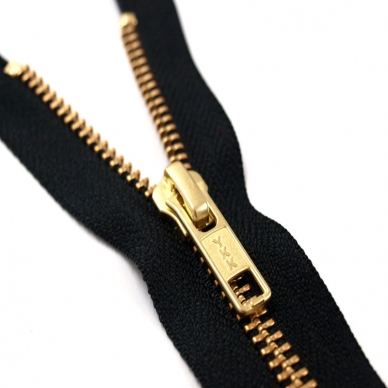

In [1]:
x = [1, 2, 3]
y = 'ABC'

list(zip(x, y))

[(1, 'A'), (2, 'B'), (3, 'C')]